# Práctica 1: Aprendizaje automático

__Fecha de entrega: XX de YYY de 2022 (CAMBIAR PARA DAR 3 SEMANAS A CADA GRUPO)__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: Pablo Heredero García y Javier Jiménez Arenas

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica.

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/Mall_Customers.csv', index_col = 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Aquí podemos ver algunas medidas básicas para el estudio de los datos. Estudiemos cada clase:


*   **Edad**: La media de edad se sitúa cerca de los 39 años. Teniendo en cuenta que el estudio es para personas mayores de 18 años, vemos que estamos ante un población joven. Esto se reafirma al mirar los cuartiles: La mediana se encuentra en 26 años y hasta un 75% de la población tiene menos de 50 años. La desviación típica es bastante alta, situándose casi en 14 años. Esto nos dice que la poblaciión está bien distribuida, no se acumulan la mayoría de los datos en los valores centrales. Por otro lado, vemos que el rango está entre 18 y 70 años, no teniendo en cuenta a la población más anciana, pudiendo ser esta una de las causas de la juventud de la población en media.

*   **Ingresos anuales**: En este apartado podemos apreciar una gran diferencia en el valor de los datos, siendo el rango desde 15000 hasta 137000 dolares anuales. Podemos ver que la media corresponde aproximadamente con el valor medio de los datos. Sin embargo, el resto de medidas nos hacen pensar que los sueldos no están bien distribuidos, pues podemos observar que en el cuartil del 75% los sueldos aún se encuntran en menos de 80000. Además, la desviación no es excesivamente alta, por lo que los valores se concentran en sueldos más cercanos a la media.

*   **Puntuación de gastos**: En este caso tenemos valores discretos. Por lo que podemos observar, la distribución aquí es bastante uniforme, pues la media se sitúa en la mitad de los valores y salvo el cuartil del 25% los otros toman los valores que se esperarían en una distribución uniforme.

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Al observar la matriz podemos apreciar que no existe una correlación fuerte entre las ganancias anuales y la edad. Esto tiene sentido pues a pesar de que la gente muy joven pueda aún estar estudiando o la gente muy mayor jubilada, se tiene que la gente en edad típica de trabajo puede tener sueldos enormemente dispares independientemente de su edad, solo por su trabajo en sí mismo. Sin embargo, es cierto que podría esperarse que con el aumento de edad las personas fueran más propensas a recibir aumentos o promociones. En nuestro caso parece suceder incluso lo contrario, a más joven mayores sueldos al menos en ligera proporción pues el coeficiente de correlación es negativo, simbolizando una proporcionalidad inversa, aunque no es muy alto.

Por otro lado, aún menos es la correlación entre la puntuación de gasto y los ingresos anuales. Esto da que pensar pues resulta extraño que a más ingresos no haya también mayores gastos. Esto podríamos achacarlo a la manera en que se mida la puntuación de gasto. Es posible que no dependa en tanta medida de la cantidad de dinero que hayas gastado sino en la cantidad o tipo de productos que compres.

Por último, tenemos la relación entre edad y puntuación de gasto. Esta es la más significativo pues es, en valor absoluto, el coeficiente más alto. Además tiene un signo negativo, indicando que los más jóvenes son los que gastan más, quizá por una menor capacidad de gestión o consciencia de los gastos.

A continuación veremos si hay diferencias apreciables separando por género:

In [ ]:
df[df['Gender'] == 'Male'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0
Annual Income (k$),88.0,62.227273,26.638373,15.0,45.50,62.5,78.0,137.0
Spending Score (1-100),88.0,48.511364,27.896770,1.0,24.50,50.0,70.0,97.0


In [ ]:
df[df['Gender'] == 'Male'].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.092978,-0.279628
Annual Income (k$),-0.092978,1.000000,-0.023684
Spending Score (1-100),-0.279628,-0.023684,1.000000


In [ ]:
df[df['Gender'] == 'Female'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,112.0,38.098214,12.644095,18.0,29.00,35.0,47.50,68.0
Annual Income (k$),112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Spending Score (1-100),112.0,51.526786,24.114950,5.0,35.00,50.0,73.00,99.0


In [ ]:
df[df['Gender'] == 'Female'].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.059912,-0.375439
Annual Income (k$),0.059912,1.000000,0.047542
Spending Score (1-100),-0.375439,0.047542,1.000000


No hay cambios demasiado significativos, el único recalcable podría ser la diferencia de sueldos máximos, siendo superior por 10000 dólares en hombre. También el valor más bajo femenino en el cuartil del 25%. Sin embargo, la diferencia es significativa, pero no enorme, por lo que podría deberse simplemente a los datos específicos escogidos.

Veamos también la dispersión de los datos de forma más gráfica:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

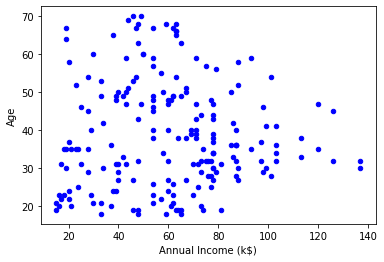

In [ ]:
df.plot.scatter(x='Annual Income (k$)', y='Age', c='Blue')

En el caso de la edad frente a los ingresos, vemos que no hay ninguna concentración apreciable. Lo único destacable es como los valores por encima de 100000 son muy raros, la mayor parte se concentra en la parte izquierda del gráfico.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

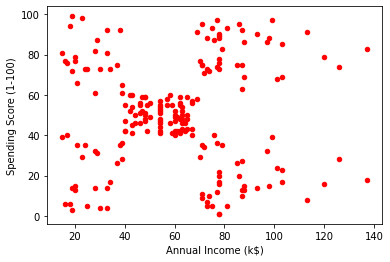

In [ ]:
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c='Red')

Ahora estudiamos la puntuación contra los ingresos. A pesar de lo que vimos al estudiar la correlación, al ver el gráfico podemos sacar nuevas conclusiones. Es cierto que el gráfico es mayormente disperso, pero hay zonas de concentración significativamente más alta. Como vemos, para sueldos en la parte central-izquierda del espectro vemos puntuacines de gasto medias, entre 40 y 60, mientras que para sueldos extremadadamente bajos o bastante por encima de la media las puntuaciones son realmente diversas. Esto llama bastante la atención especialmente en el caso de la gente con bajos ingresos y alta puntuación. Pero como dijimos anteriormente, puede que esta puntuación no se limite únicamente a la cantidad de dinero invertido, a lo cual atribuiremos esta anomalía.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

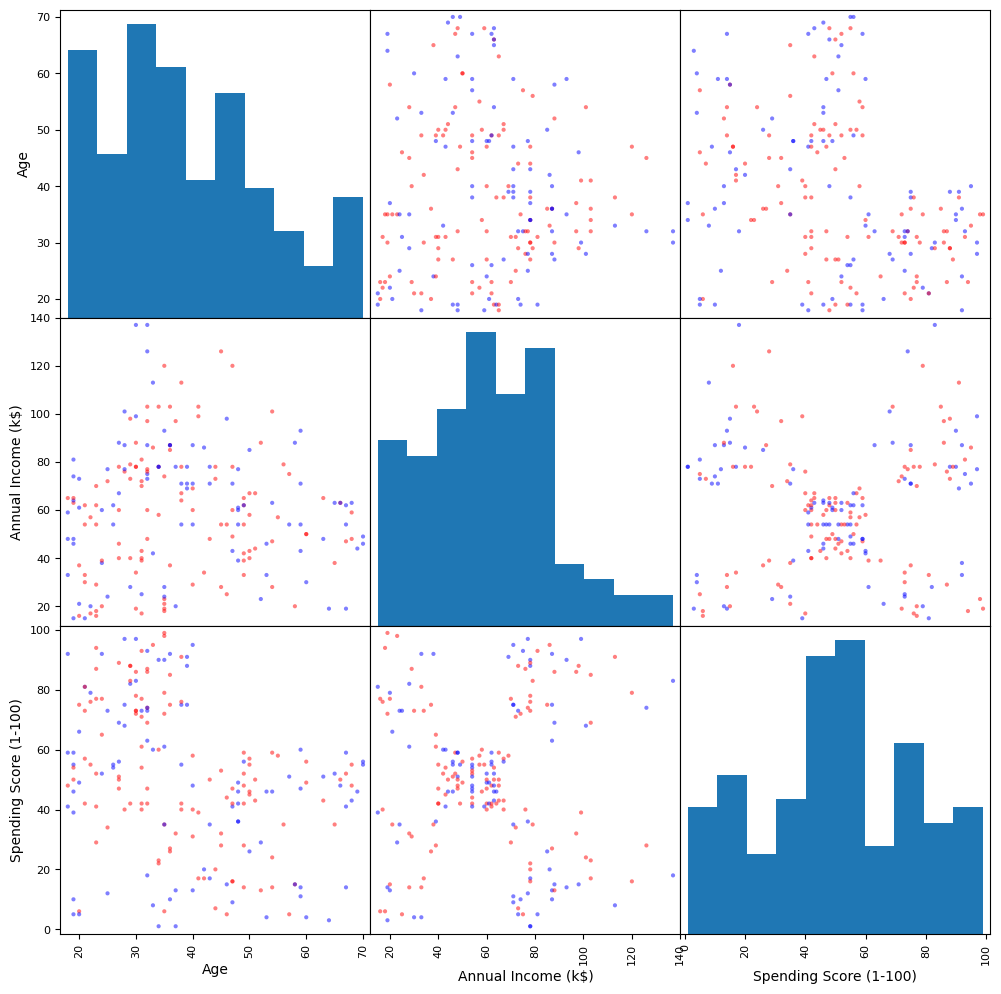

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'Male':'blue', 'Female':'red'}
colors = df['Gender'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color = colors)

Por último, añadimos la matriz de gráficos comparando las clases para poder comparar visual y fácilmente la distribución de datos. Con los histogramas además confirmamos nuestras observaciones de población bastante joven y sueldos altos como algo raro.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

<Axes: >

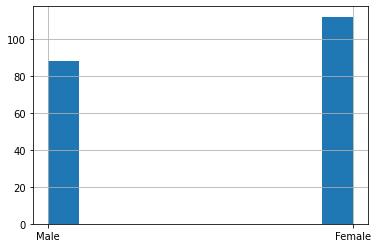

In [ ]:
df['Gender'].hist()

En este diagrama de frecuencias se puede apreciar la distribución de los datos en función del género de los clientes. Hay una cantidad similar de hombres y de mujeres, aunque son estas últimas las que predominan en el conjunto de los datos.

<Axes: >

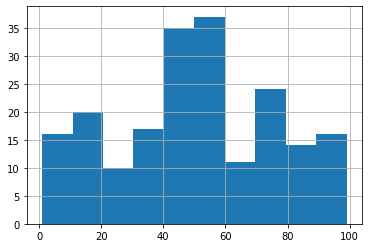

In [ ]:
df['Spending Score (1-100)'].hist()

Este diagrama de frecuencias muestra el número de clientes por cada rango de gasto. Se puede ver en él que lo más habitual dentro del conjunto de los clientes es una capacidad de gasto moderada, entre 40-60. Hacia los extremos (0 y 100) va decreciendo el número de clientes, aunque con algún pequeño pico entre los 10-20 y 70-80.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Inicialmente vamos a visualizar los datos enfrentando la variable Annual Income frente a Spending Score en un gráfico:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

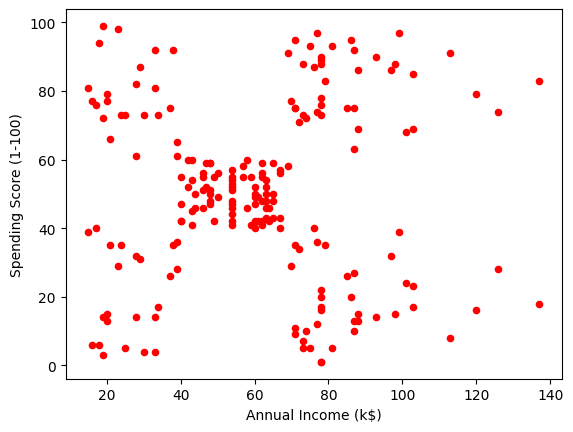

In [ ]:
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c='red')


Por lo que se puede ver en el diagrama, se aprecian (de forma aproximada) 5 clusters razonablemente diferenciados. Las escalas de ambas variables son similares pues ambas alcanzan valores máximos parecidos. Por esta razón seguramente se podrían aplicar los distintos algoritmos de clustering a estos datos sin preprocesar, y estos funcionarían correctamente.
Aun así, para un funcionamiento óptimo de los algoritmos que usaremos más adelante, vamos a reescalar y a estandarizar los datos separadamente y ver si así resulta más clara todavía la futura división en clusters.

Primeramente vamos a reescalar los datos originales usando los valores mínimo y máximo con MinMaxScaler, y mostrar el resultado gráficamente:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df[['Annual Income (minmax)', 'Spending Score (minmax)']] = min_max_scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_minmax = df[['Annual Income (minmax)', 'Spending Score (minmax)']].copy(); # Hacemos una copia con los datos escalados
df_minmax

,Annual Income (minmax),Spending Score (minmax)
CustomerID,,
1,0.000000,0.387755
2,0.000000,0.816327
3,0.008197,0.051020
4,0.008197,0.775510
5,0.016393,0.397959
...,...,...
196,0.860656,0.795918
197,0.909836,0.275510
198,0.909836,0.744898


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-0.05, 1.05, -0.049999999999999996, 1.0499999999999998)

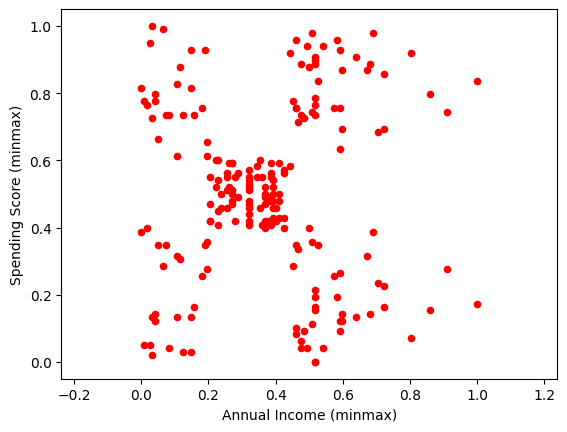

In [ ]:
scatter1 = df_minmax.plot.scatter(x='Annual Income (minmax)', y='Spending Score (minmax)', c='red')

scatter1.axis('equal')

Como se puede ver, las escalas han cambiado y ahora los valores están entre 0.0-1.0, mientras que antes estaban entre 0-100/140. Las distancias entre los puntos también han cambiado y en el gráfico se pueden apreciar ligeramente más compactos que antes. Este reescalado puede resultar más preciso que los datos originales de cara a su uso en algoritmos de clustering, como haremos a continuación

Para poder comparar las distintas posibilidades de preprocesado, vamos ahora a hacer una estandarización de los datos, que consistirá en restarles su media y dividirlos entre su desviación típica. A continuación mostramos los resultados gráficamente:

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

# Fase de ajuste
standard_scaler.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Fase de transformación
df[['Annual Income (standard)','Spending Score (standard)']] = standard_scaler.transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df_std = df[['Annual Income (standard)','Spending Score (standard)']].copy() # Hacemos una copia con los datos estandarizados

df_std

,Annual Income (standard),Spending Score (standard)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


(-1.97183271101376, 3.15050468383809, -2.1002464344938314, 2.0847178102092188)

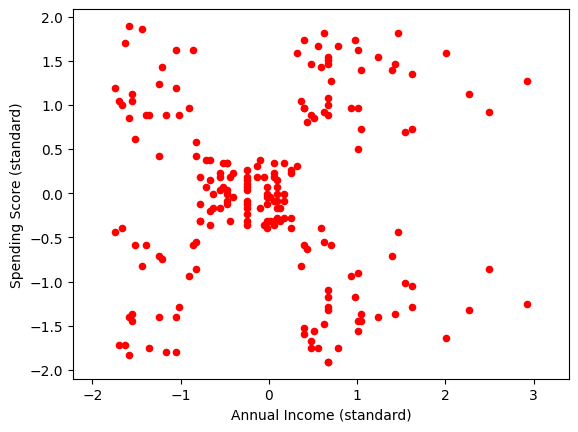

In [ ]:
scatter1 = df.plot.scatter(x='Annual Income (standard)', y='Spending Score (standard)', c='red')

scatter1.axis('equal')

En este segundo tipo de preprocesado se puede ver que la escala también cambia notablemente con respecto a la escala original, estando ahora los valores de ambas variables entre -2 y 3. De la misma forma que con el reescalado, se aprecia un cambio en las distancias entre los puntos, y resultan más compactos que en los datos originales. Esta estandarización presenta también diferencias con el reescalado anterior, ya que en este caso los datos están centrados en el (0,0) y no en el (0.4, 0.5). Además los datos resultan menos compactos así que con el preprocesado por reescalado.  
Por estas razones, elegiremos el reescalado como el preprocesado de los datos que usaremos de ahora en adelante.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

Primeramente importamos todas las bibliotecas necesarias para los procesamientos que vamos a hacer:

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

Utilizaremos el siguiente procedimiento para mostrar gráficamente la división de los datos en clusters:

In [ ]:
def plot_clusters(X, labels=None, centers=None):

    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))

    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)

    plt.show()

Inicialmente vamos a hacer una sucesión de pruebas con los datos, intentando agruparlos en distinto número de clusters, desde 2 hasta 10. Utilizaremos para ello el algoritmo de k-medias con los datos reescalados como hemos visto anteriormente. Para cada caso guardaremos también su índice de Davies-Boulding, que se define como razón entre las distancias intra-cluster y las distancias inter-cluster. Una vez tengamos todos los datos y las representaciones gráficas, podremos sacar algunas conclusiones acerca de cuál es el número óptimo de clusters para este conjunto de datos.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


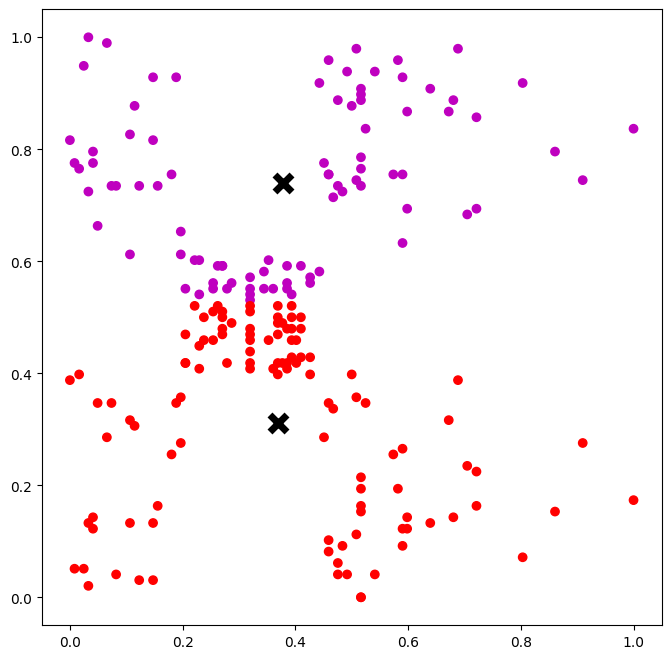

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


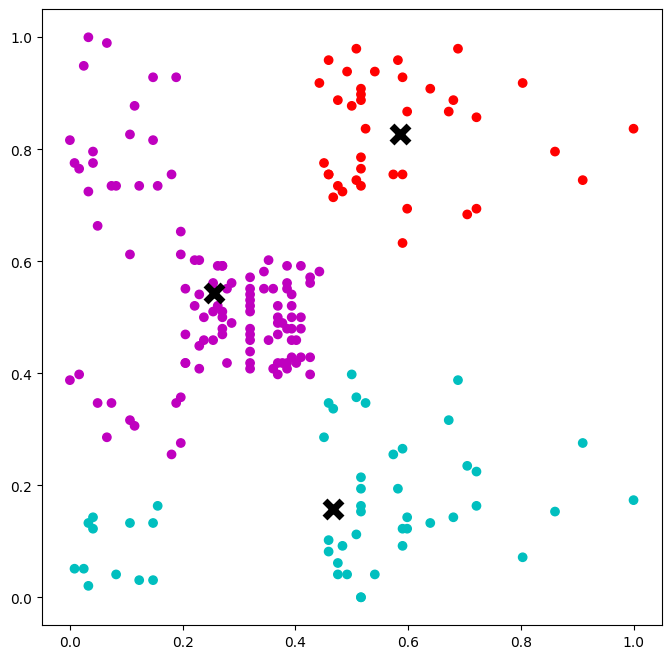

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


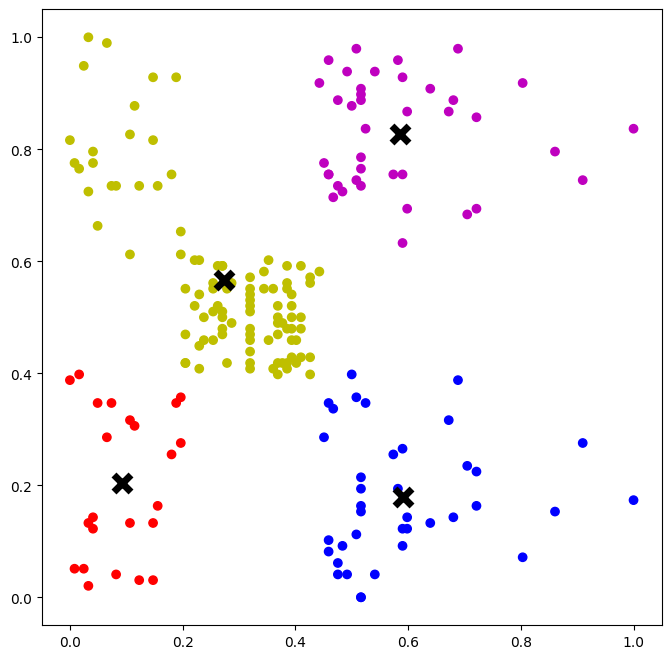

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


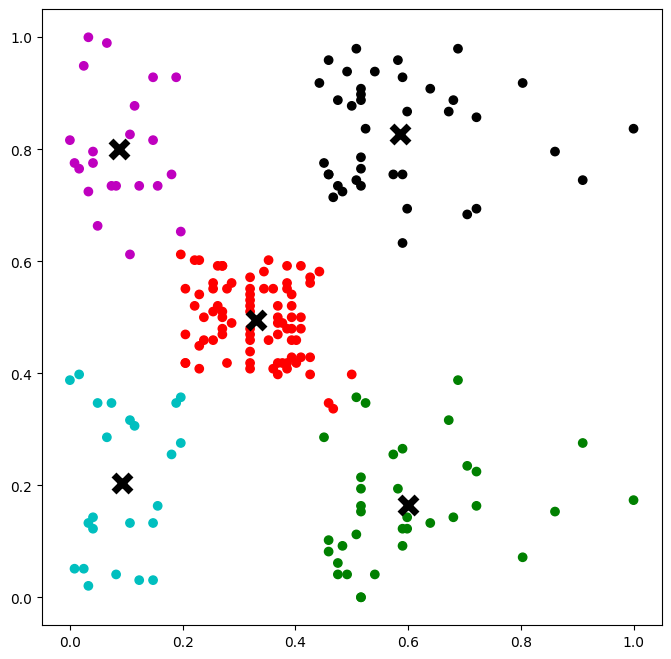

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


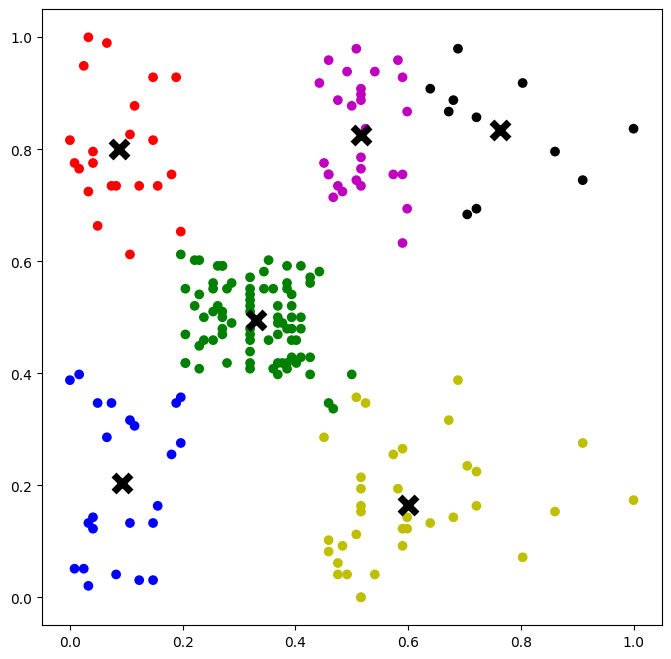

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


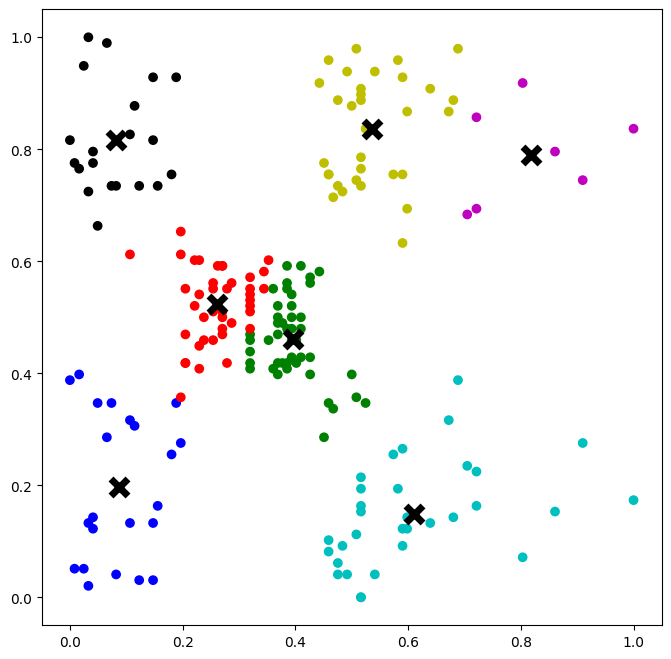

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


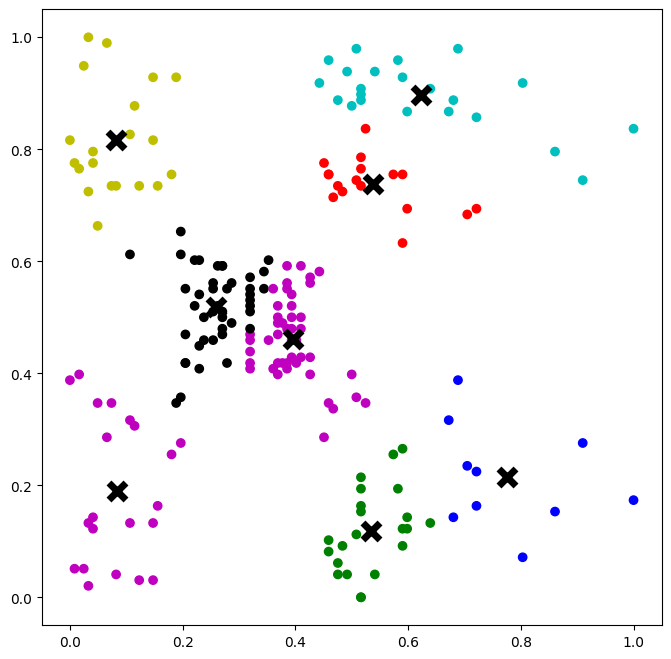

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


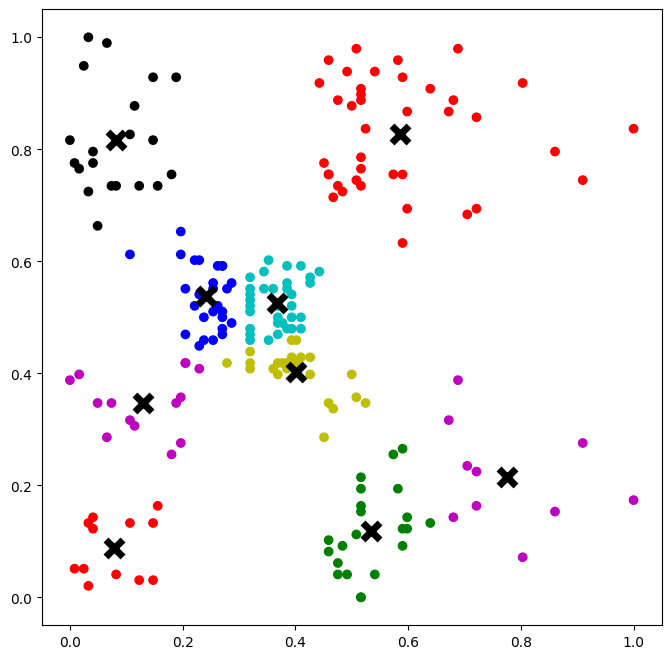

In [ ]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
inertias = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)
    inertias[k - 2] = km.inertia_
    plot_clusters(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, km.labels_, km.cluster_centers_)

    davies_boulding[k-2] = davies_bouldin_score(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, km.labels_)

Como podemos ver gracias a las representaciones gráficas, a simple vista parece lo más razonable que agrupemos los datos en 5 clusters, tal y como habíamos intuido anteriormente. Sin embargo, para tener una mayor certeza acerca de este hecho, vamos a representar la evolución del índice Davies-Boulding según hemos ido variando el número de clusters. El índice tendrá un valor más pequeño cuando más compactos y separados estén los clusters.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

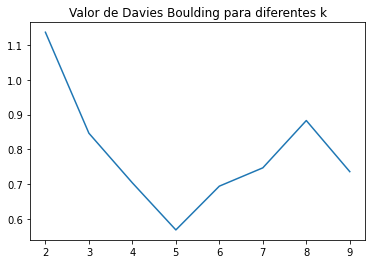

In [ ]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Efectivamente el valor del índice de Davies-Boulding es mínimo para 5 clusters, tal y como habíamos podido intuir gráficamente antes.

Otra forma eficaz para determinar el número óptimo de clusters es diujar el diagrama de codo, tomando como índice de calidad el valor de la suma de los centroides para cada número de clusters. El cambio de tendencia que tiene el gráfico para k=5 nos confirma el resultado que hemos concluido anteriormente: el número óptimo de clusters en los que dividir los datos es 5.

Text(0.5, 1.0, 'Diagrama de Codo: Valor de suma de centroides para diferentes k')

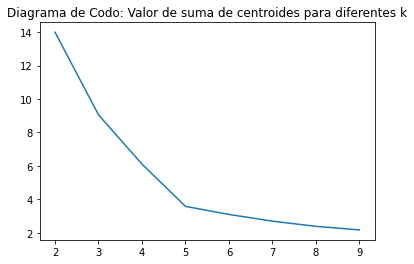

In [ ]:
plt.plot(range(2, K_MAX), inertias)
plt.title('Diagrama de Codo: Valor de suma de centroides para diferentes k')

Finalmente mostramos gráficamente la división de los datos en 5 clusters:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


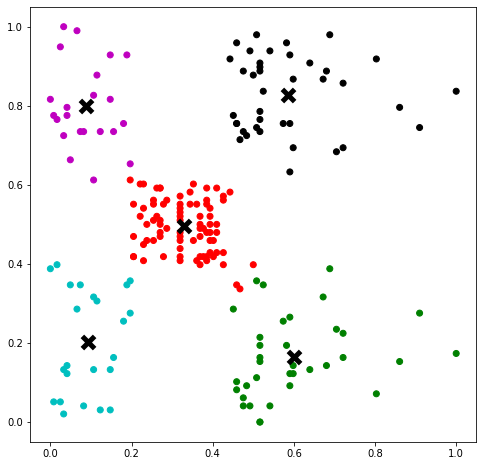

In [ ]:
km = KMeans(init='random', n_clusters=5, random_state=333)

km.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)

labels = km.labels_
centers = km.cluster_centers_

plot_clusters(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, labels, centers)

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

En primer lugar vamos a calcular (de nuevo) la división en 5 clusters utilizando el algoritmo de k-medias (con los datos reescalados), y también recogeremos los datos de los centroides de cada cluster:

In [ ]:
km = KMeans(init='random', n_clusters=5, random_state=333)
km.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)


centers = km.cluster_centers_
centers

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

Para poder interpretar correctamente la división de los datos en clusters, vamos a recuperar los valores originales, asociándoles el correspondiente cluster que ha resultado de ejecutar el algoritmo con los datos reescalados:

In [ ]:
df_stat1 = pd.DataFrame(data=df[['Annual Income (k$)', 'Spending Score (1-100)']].values, columns=['Annual Income','Spending Score'])
df_stat1 = df_stat1.assign(cluster=pd.Series(data=km.labels_))
df_stat1

,Annual Income,Spending Score,cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


Una vez con estos datos, podemos analizar estadísticamente las dos variables separadamente en cada cluster:

In [ ]:
df_stat1.groupby(["cluster"]).describe().transpose()

cluster                       0           1          2           3          4
Annual Income  count  81.000000   35.000000  23.000000   39.000000  22.000000
               mean   55.296296   88.200000  26.304348   86.538462  25.727273
               std     8.988109   16.399067   7.893811   16.312485   7.566731
               min    39.000000   70.000000  15.000000   69.000000  15.000000
               25%    48.000000   77.500000  19.500000   75.500000  19.250000
               50%    54.000000   85.000000  25.000000   79.000000  24.500000
               75%    62.000000   97.500000  33.000000   95.000000  32.250000
               max    76.000000  137.000000  39.000000  137.000000  39.000000
Spending Score count  81.000000   35.000000  23.000000   39.000000  22.000000
               mean   49.518519   17.114286  20.913043   82.128205  79.363636
               std     6.530909    9.952154  13.017167    9.364489  10.504174
               min    34.000000    1.000000   3.000000   63.000000  61.000000
               25%    44.000000   10.000000   9.500000   74.500000  73.000000
               50%    50.000000   16.000000  17.000000   83.000000  77.000000
               75%    55.000000   23.500000  33.500000   90.000000  85.750000
               max    61.000000   39.000000  40.000000   97.000000  99.000000

En base a estos resultados, podemos obtener ya algunas conclusiones:
- Los clusters 1 y 3 tienen valores muy parecidos en número total de elementos y en los estadísticos descriptivos correspondientes a la variable "Annual Income" (media, desviación típica, percentiles, máximo y mínimo toman todos valores muy similares). Sin embargo en todos sus estadísticos presentan grandes diferencias cuando se trata de la variable "Spending Score". Esta relación es igualmente apreciable entre los clusters 2 y 4.

- Los clusters 1 y 2 tienen valores muy parecidos en los estadísticos descriptivos correspondientes a la variable "Spending Score" (media, desviación típica, percentiles, máximo y mínimo toman todos valores muy similares). Sin embargo en todos sus estadísticos presentan grandes diferencias cuando se trata de la variable "Annual Income". Esta relación es igualmente apreciable entre los clusters 3 y 4.

- Por su parte, el cluster 0 presenta valores razonablemente alejados del resto de clusters, y en un primer análisis no se pueden establecer relaciones con ningún otro cluster.

Todas estas conclusiones vienen a confirmarnos la estructura de los clusters en los que hemos dividido los datos, resultando en cierta forma de "cuadrícula", con cuatro clusters en las esquinas y uno en el centro.

A continuación mostramos en dos gráficos la densidad de los valores de cada variable en cada uno de los 5 clusters:



cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: Annual Income, dtype: object

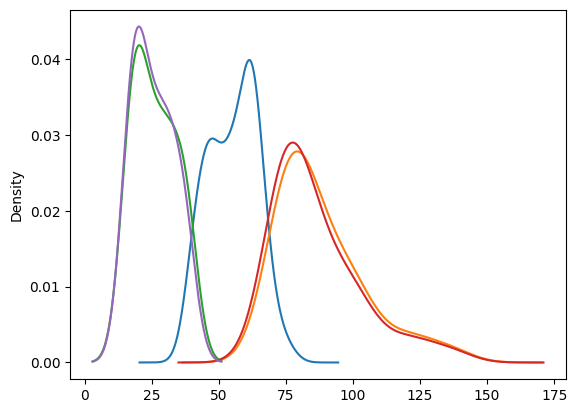

In [ ]:
df_stat1.groupby(["cluster"])["Annual Income"].plot(kind="density")

cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: Spending Score, dtype: object

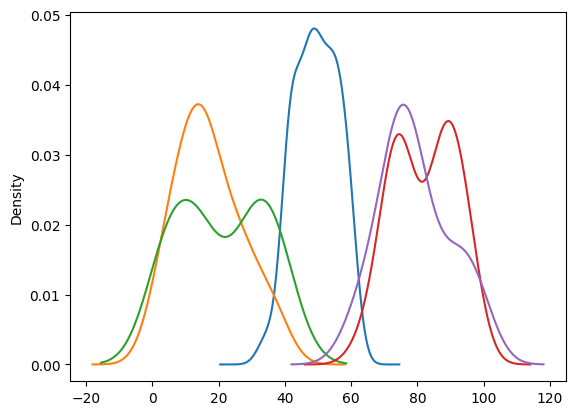

In [ ]:
df_stat1.groupby(["cluster"])["Spending Score"].plot(kind="density")

En base a todos los análisis y representaciones que hemos hecho en este último apartado, podemos ver que la división en 5 clusters es la más razonable, y produce una separación clara entre 5 tipos de clientes:

- El cluster 0, que gráficamente se encuentra en el centro del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto y unos ingresos anuales moderados (gasto entre 20 y 70 pts./100 e ingresos entre 25 y 80 k\$).
- El cluster 1, que gráficamente se encuentra en la esquina inferior derecha del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto baja (entre 1 y 40 pts./100) y unos ingresos anuales elevados (entre 70 y 137 k\$).
- El cluster 2, que gráficamente se encuentra en la esquina inferior izquierda del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto baja (entre 3 y 40 pts./100) y unos ingresos anuales bajos (entre 15 y 39 k\$).
- El cluster 3, que gráficamente se encuentra en la esquina superior derecha del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto alta (entre 63 y 97 pts./100) y unos ingresos anuales elevados (entre 69 y 137 k\$).
- El cluster 4, que gráficamente se encuentra en la esquina superior izquierda del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto alta (entre 61 y 99 pts./100) y unos ingresos anuales bajos (entre 15 y 39 k\$).

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



De igual manera que en el apartado anterior, vamos preprocesar los datos originales escalándolos en función de sus valores máximo y mínimo (MinMaxScaler). Por tanto reutilizamos los resultados obtenidos en el apartado anterior de preprocesado de datos.

Inicialmente, y en la misma línea que el apartado anterior, vamos a hacer una serie de 9 simulaciones del algoritmo jerárquico aglomerativo, una para cada valor de K (de 2 a 8), siendo este el número de clusters en los que dividimos todos los elementos del conjunto de datos. Con los resultados, mostrados gráficamente, podremos hacernos una idea aproximada de cuál es el número óptimo de clusters. Para cada ejecución con un K distinto, guardaremos también el valor del índice de Davies-Boulding.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


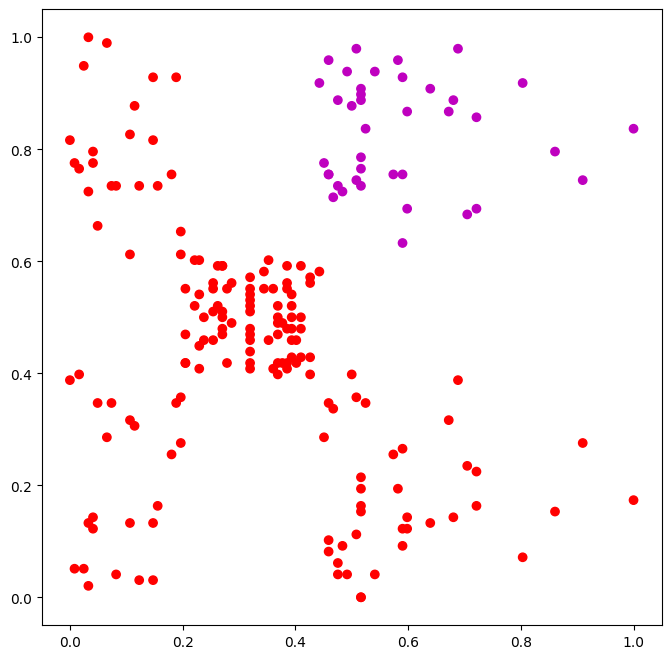

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


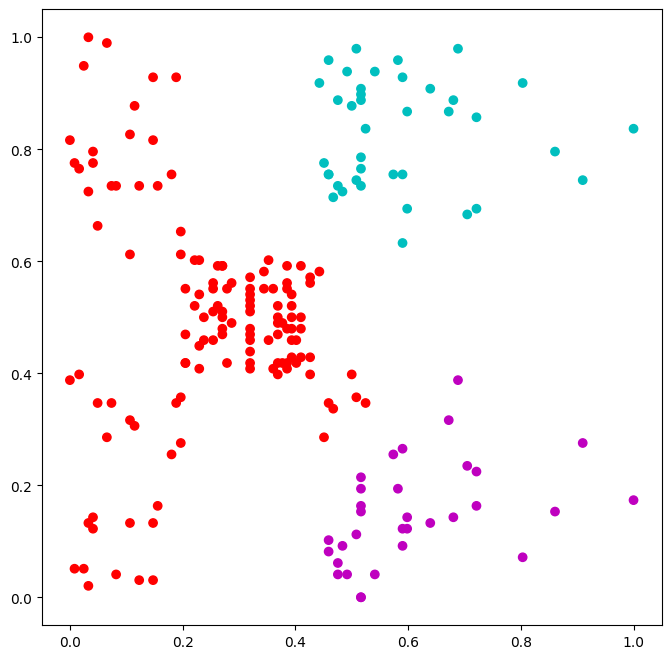

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


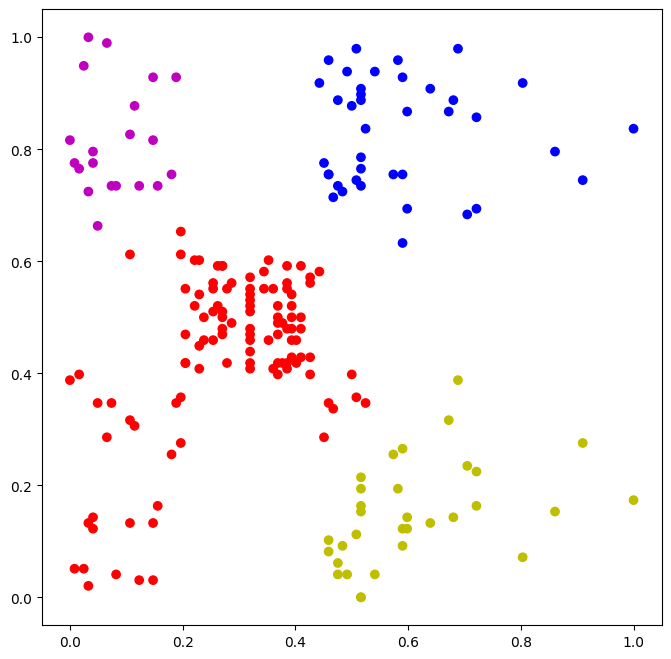

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


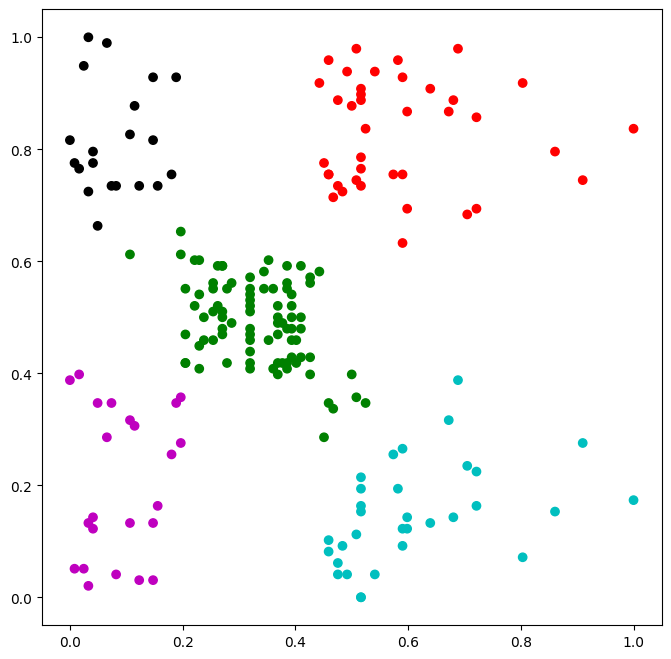

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


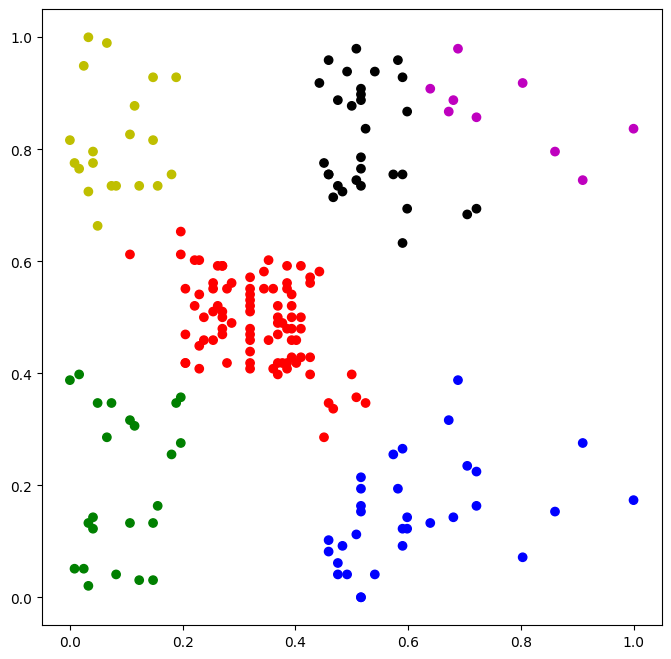

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


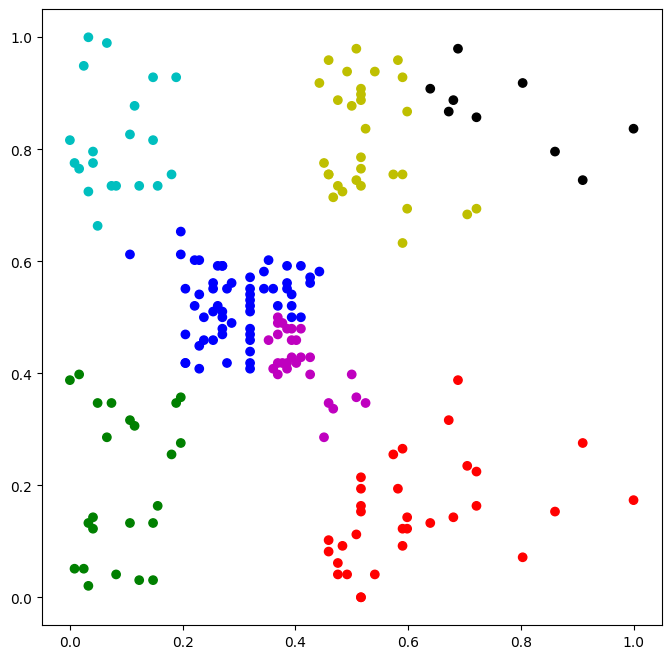

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


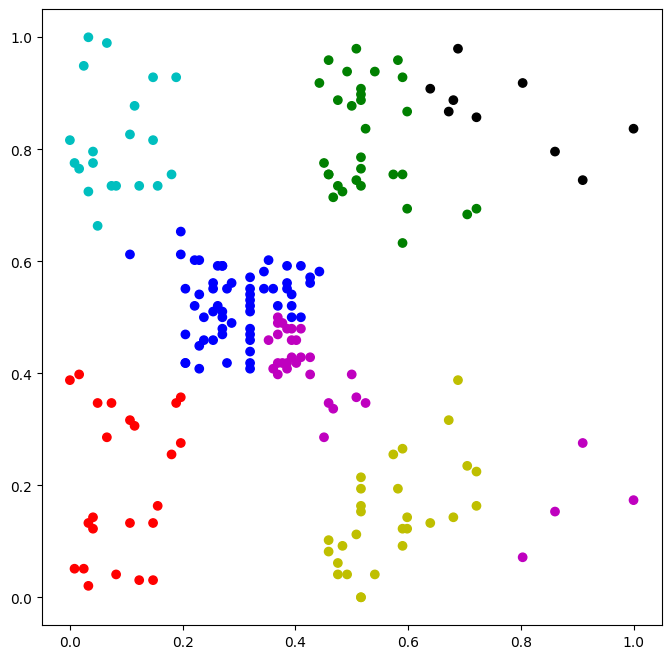

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


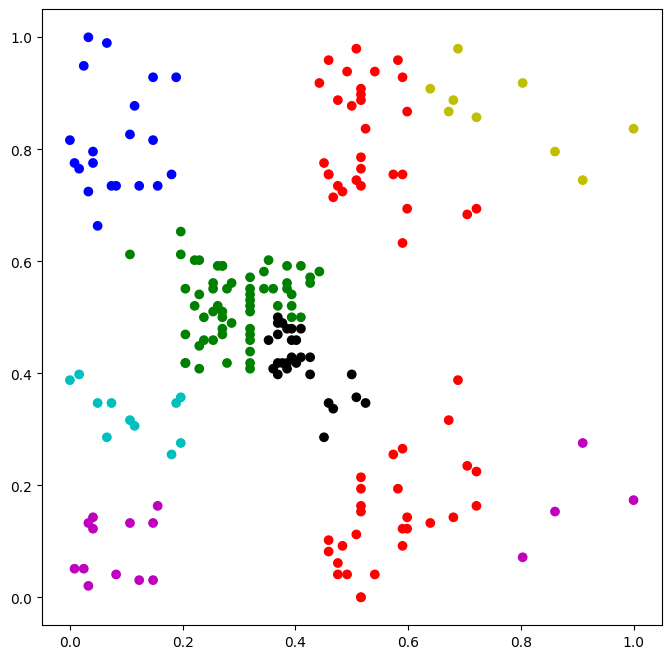

In [ ]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
distances = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean', compute_distances = True)
    ag.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)
    plot_clusters(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, ag.labels_)

    distances[k - 2] = max(ag.distances_)
    davies_boulding[k-2] = davies_bouldin_score(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, ag.labels_)

Como se puede ver en los gráficos generados por cada una de las ejecuciones del algoritmo, y acorde a los resultados obtenidos anteriormente por el algoritmo de k-medias, el número de clusters en los que parece más razonable dividir los datos es 5. Sin embargo, esta es una visión gráfica aproximada. Para certificar más esta conclusión, representamos los índices de Davies-Boulding para los distintos valores de K y poder ver así cuál es el valor más bajo. Éste corresponderá con el número óptimo de clusters.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

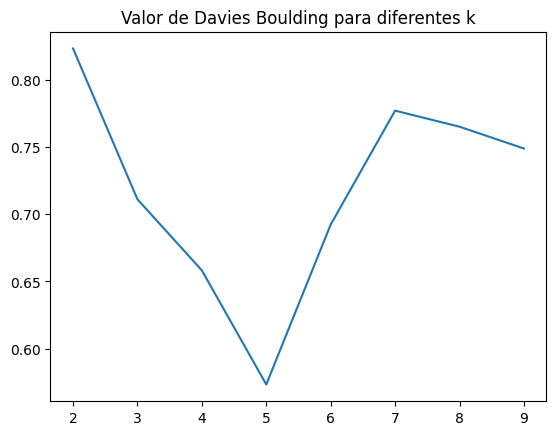

In [ ]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Tal y como se ve en la gráfica anterior, y reafirmando las conclusiones anteriores, el índice de Davies-Boulding alcanza su valor mínimo para K=5, y por tanto serán 5 los clusters para hacer una división óptima.

A continuación hacemos una ejecución del algoritmo para K=5 y lo representamos gráficamente. Podemos ver claramente que la división en clusters es prácticamente idéntica a la realizada por el algoritmo de k-medias en el apartado anterior.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


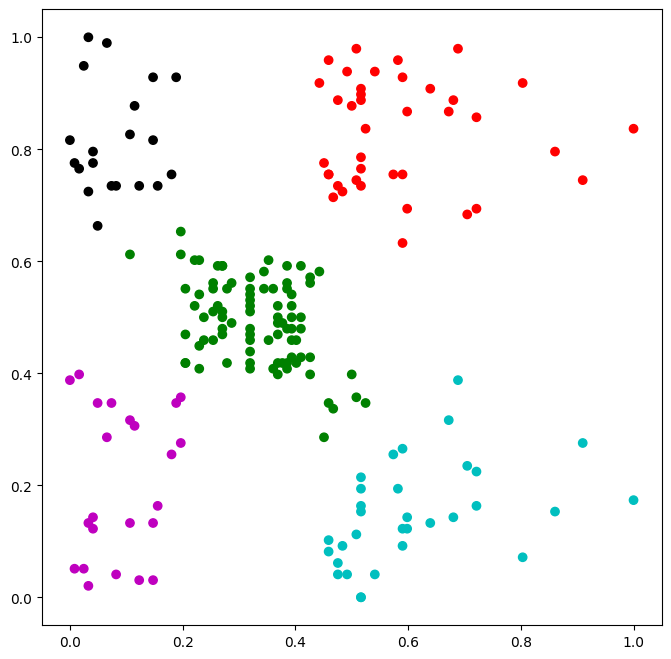

In [ ]:
# Crear una instancia del agrupador jerárquico aglomerativo
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean', compute_distances = True)

# Agrupar los puntos en clusters
ag.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

plot_clusters(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values, labels)

A continuación especificamos un procedimiento para mostrar el dendograma correspondiente a la división en clusters generada por el algoritmo aglomerativo que acabamos de ejecutar:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


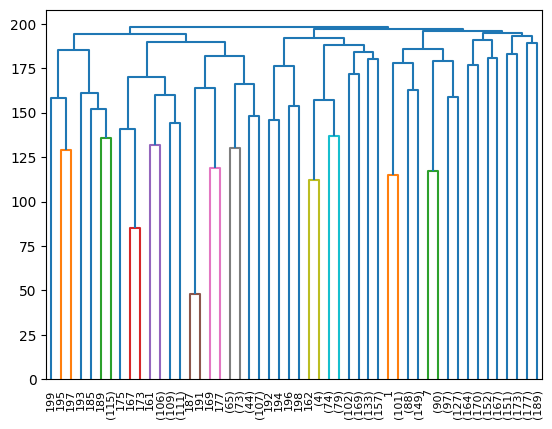

In [ ]:
# Sciki-learn no pinta el dendrograma, pero scipy sí,
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean', compute_distances = True)
ag.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')
# Árbol completo
#plot_dendrogram(ag)

Para una mayor claridad, el anterior dendograma está recortado y sólo se ven los primeros 5 niveles del árbol, y con él ya se pueden ver algunos detalles significativos. Por ejemplo, que alcanza la agrupación en un único cluster para una distancia con valor 200, o que la mayoría de agrupaciones se producen en un rango de distancias entre 115 y 180. El algoritmo alcanza una división en 5 clusters para un valor de distancia de aproximadamente 190 puntos.


Procedemos ahora a hacer, igual que para el apartado anterior, un análisis estadístico de los resultados obtenidos. Comenzamos recuperando los valores originales, asociándoles el correspondiente cluster que ha resultado de ejecutar el algoritmo con los datos reescalados:

In [ ]:
# Crear una instancia del agrupador jerárquico aglomerativo
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')

# Agrupar los puntos en clusters
ag.fit(df[['Annual Income (minmax)', 'Spending Score (minmax)']].values)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

df_stat2 = pd.DataFrame(data=df[['Annual Income (k$)', 'Spending Score (1-100)']].values, columns=['Annual Income','Spending Score'])
df_stat2 = df_stat2.assign(cluster=pd.Series(data=ag.labels_))
df_stat2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Annual Income,Spending Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


Y ahora, con el método describe(), obtenemos los estadísticos descriptivos más relevantes por cada variable y cluster:

In [ ]:
df_stat2.groupby(["cluster"]).describe().transpose()

cluster                        0          1           2          3          4
Annual Income  count   39.000000  86.000000   32.000000  20.000000  23.000000
               mean    86.538462  55.488372   89.406250  24.950000  26.304348
               std     16.312485  10.128288   16.612975   7.287155   7.893811
               min     69.000000  28.000000   71.000000  15.000000  15.000000
               25%     75.500000  48.000000   78.000000  19.000000  19.500000
               50%     79.000000  55.500000   86.500000  23.500000  25.000000
               75%     95.000000  63.000000   98.250000  30.750000  33.000000
               max    137.000000  79.000000  137.000000  38.000000  39.000000
Spending Score count   39.000000  86.000000   32.000000  20.000000  23.000000
               mean    82.128205  49.267442   15.593750  81.000000  20.913043
               std      9.364489   7.350749    8.936548   9.514532  13.017167
               min     63.000000  29.000000    1.000000  66.000000   3.000000
               25%     74.500000  43.000000    9.750000  73.000000   9.500000
               50%     83.000000  49.500000   15.000000  78.000000  17.000000
               75%     90.000000  55.000000   20.500000  88.250000  33.500000
               max     97.000000  65.000000   39.000000  99.000000  40.000000

Una vez con estos datos, podemos analizarlos y obtener conclusiones acerca de los agrupamientos que se han realizado. Observando los valores de los estadísticos, vemos que toman valores prácticamente idénticos a los recogidos en el caso del algoritmo k-means:

- Los clusters 0 y 2 tienen valores muy parecidos en número total de elementos y en los estadísticos descriptivos correspondientes a la variable "Annual Income" (media, desviación típica, percentiles, máximo y mínimo toman todos valores muy similares). Sin embargo en todos sus estadísticos presentan grandes diferencias cuando se trata de la variable "Spending Score". Esta relación es igualmente apreciable entre los clusters 3 y 4.

- Los clusters 0 y 3 tienen valores muy parecidos en los estadísticos descriptivos correspondientes a la variable "Spending Score" (media, desviación típica, percentiles, máximo y mínimo toman todos valores muy similares). Sin embargo en todos sus estadísticos presentan grandes diferencias cuando se trata de la variable "Annual Income". Esta relación es igualmente apreciable entre los clusters 2 y 4.

- Por su parte, el cluster 1 presenta valores razonablemente alejados del resto de clusters, y en un primer análisis no se pueden establecer relaciones con ningún otro cluster.

Todas estas conclusiones vienen a confirmarnos la estructura de los clusters en los que hemos dividido los datos, resultando en cierta forma de "cuadrícula", con cuatro clusters en las esquinas y uno en el centro.

A continuación mostramos en dos gráficos la densidad de los valores de cada variable en cada uno de los 5 clusters:

cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: Annual Income, dtype: object

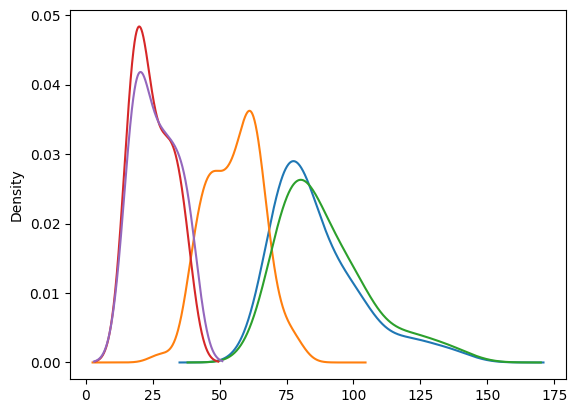

In [ ]:
df_stat2.groupby(["cluster"])["Annual Income"].plot(kind="density")

cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: Spending Score, dtype: object

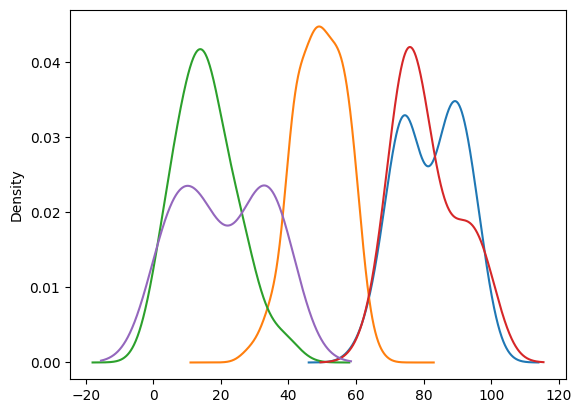

In [ ]:
df_stat2.groupby(["cluster"])["Spending Score"].plot(kind="density")

En base a todos los análisis y representaciones que hemos hecho en este último apartado, podemos ver que la división en 5 clusters es la más razonable, y produce una separación clara entre 5 tipos de clientes:

- El cluster 1, que gráficamente se encuentra en el centro del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto y unos ingresos anuales moderados (gasto entre 29 y 65 pts./100 e ingresos entre 28 y 79 k\$).
- El cluster 2, que gráficamente se encuentra en la esquina inferior derecha del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto baja (entre 1 y 39 pts./100) y unos ingresos anuales elevados (entre 71 y 137 k\$).
- El cluster 4, que gráficamente se encuentra en la esquina inferior izquierda del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto baja (entre 3 y 40 pts./100) y unos ingresos anuales bajos (entre 15 y 39 k\$).
- El cluster 0, que gráficamente se encuentra en la esquina superior derecha del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto alta (entre 63 y 97 pts./100) y unos ingresos anuales elevados (entre 69 y 137 k\$).
- El cluster 3, que gráficamente se encuentra en la esquina superior izquierda del diagrama, corresponde con un conjunto de clientes con una capacidad de gasto alta (entre 61 y 99 pts./100) y unos ingresos anuales bajos (entre 15 y 39 k\$).